In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dataset = 'GreenGenes'
metric = 'hamming'
max_depth = 100

In [3]:
raw_data = pd.read_csv(
    f'logs/info_{metric}_{max_depth}.csv',
    dtype={
        'cluster_name': str,
        'number_of_points': int,
        'center': int,
        'radius': np.float64,
        'lfd': np.float64,
        'is_leaf': bool,
    }
)
raw_data['cluster_name'][0] = ''
raw_data = raw_data.fillna(0.0)
raw_data['depth'] = list(map(len, raw_data.cluster_name.values))
raw_data.head()

/home/nishaq/Documents/research/CHESS/.chess/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
0,,1017383,602903,0.102187,0.131874,False,0
1,0,14293,305765,0.100495,0.508688,False,1
2,00,8177,229000,0.065087,1.063665,False,2
3,000,1453,684782,0.061312,2.556452,False,3
4,0000,918,684782,0.055845,2.744318,False,4


In [4]:
raw_data.shape

(372459, 7)

In [5]:
leaves = list(raw_data[raw_data.is_leaf == True].cluster_name.values)
print(len(leaves))

186233


In [6]:
tree_depth = max(raw_data.depth.values)
max_lfd = max(raw_data.lfd.values)
print(tree_depth, max_lfd)

100 8.05047658


In [7]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,3.724590e+05,3.724590e+05,372459.000000,372459.000000,372459.000000
mean,1.218658e+02,5.358620e+05,0.006323,0.663456,33.401582
std,3.277068e+03,2.873611e+05,0.010470,0.675454,16.699302
min,1.000000e+00,3.000000e+00,0.000000,0.000000,0.000000
25%,3.000000e+00,3.091030e+05,0.000391,0.086415,23.000000
50%,1.100000e+01,5.469660e+05,0.001041,0.502500,29.000000
75%,3.400000e+01,7.784590e+05,0.007810,1.000000,37.000000
max,1.017383e+06,1.017378e+06,0.102187,8.050477,100.000000


In [8]:
raw_data[raw_data.lfd > 10]
# raw_data.lfd.clip(lower=0, upper=5, inplace=True)

,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth


In [9]:
fractal_dim_by_depth = [raw_data[raw_data.depth == i] for i in range(1 + max(raw_data.depth))]
fractal_dim_by_depth[3].head(20)

,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
3,000,1453,684782,0.061312,2.556452,False,3
598,001,6724,897450,0.061703,0.846667,False,3
3168,010,6082,327318,0.069774,1.265408,False,3
5629,011,34,401371,0.066259,0.765535,False,3
5640,100,107240,960226,0.081489,0.229141,False,3
48531,101,165666,55465,0.088519,0.414126,False,3
106635,110,315540,424975,0.076543,0.680360,False,3
234436,111,414644,420090,0.091252,0.095924,False,3


In [10]:
print(f'depth, number_of_clusters, r_median, r_mean, r_stddev')
for d, temp_df in enumerate(fractal_dim_by_depth):
    mean_radius = temp_df.radius.mean()
    median_radius = temp_df.radius.median()
    stddev_radius = temp_df.radius.std()
    if d % 10 == 0:
        print(f'{d}, {temp_df.shape[0]}, {median_radius:.5f}, '
              f'{mean_radius:.5f}, {stddev_radius:.5f}')

depth, number_of_clusters, r_median, r_mean, r_stddev
0, 1, 0.10219, 0.10219, nan
10, 616, 0.04524, 0.04256, 0.01718
20, 12136, 0.01172, 0.01360, 0.01169
30, 13970, 0.00104, 0.00291, 0.00423
40, 4494, 0.00052, 0.00078, 0.00125
50, 2114, 0.00039, 0.00048, 0.00050
60, 1312, 0.00039, 0.00045, 0.00043
70, 946, 0.00039, 0.00042, 0.00037
80, 776, 0.00039, 0.00039, 0.00033
90, 602, 0.00039, 0.00037, 0.00033
100, 474, 0.00039, 0.00037, 0.00028


In [11]:
labels = [i / 10 for i in range(11)]
quantiles = {i : [temp_df.lfd.quantile(l) for l in labels]
             for i, temp_df in enumerate(fractal_dim_by_depth)}

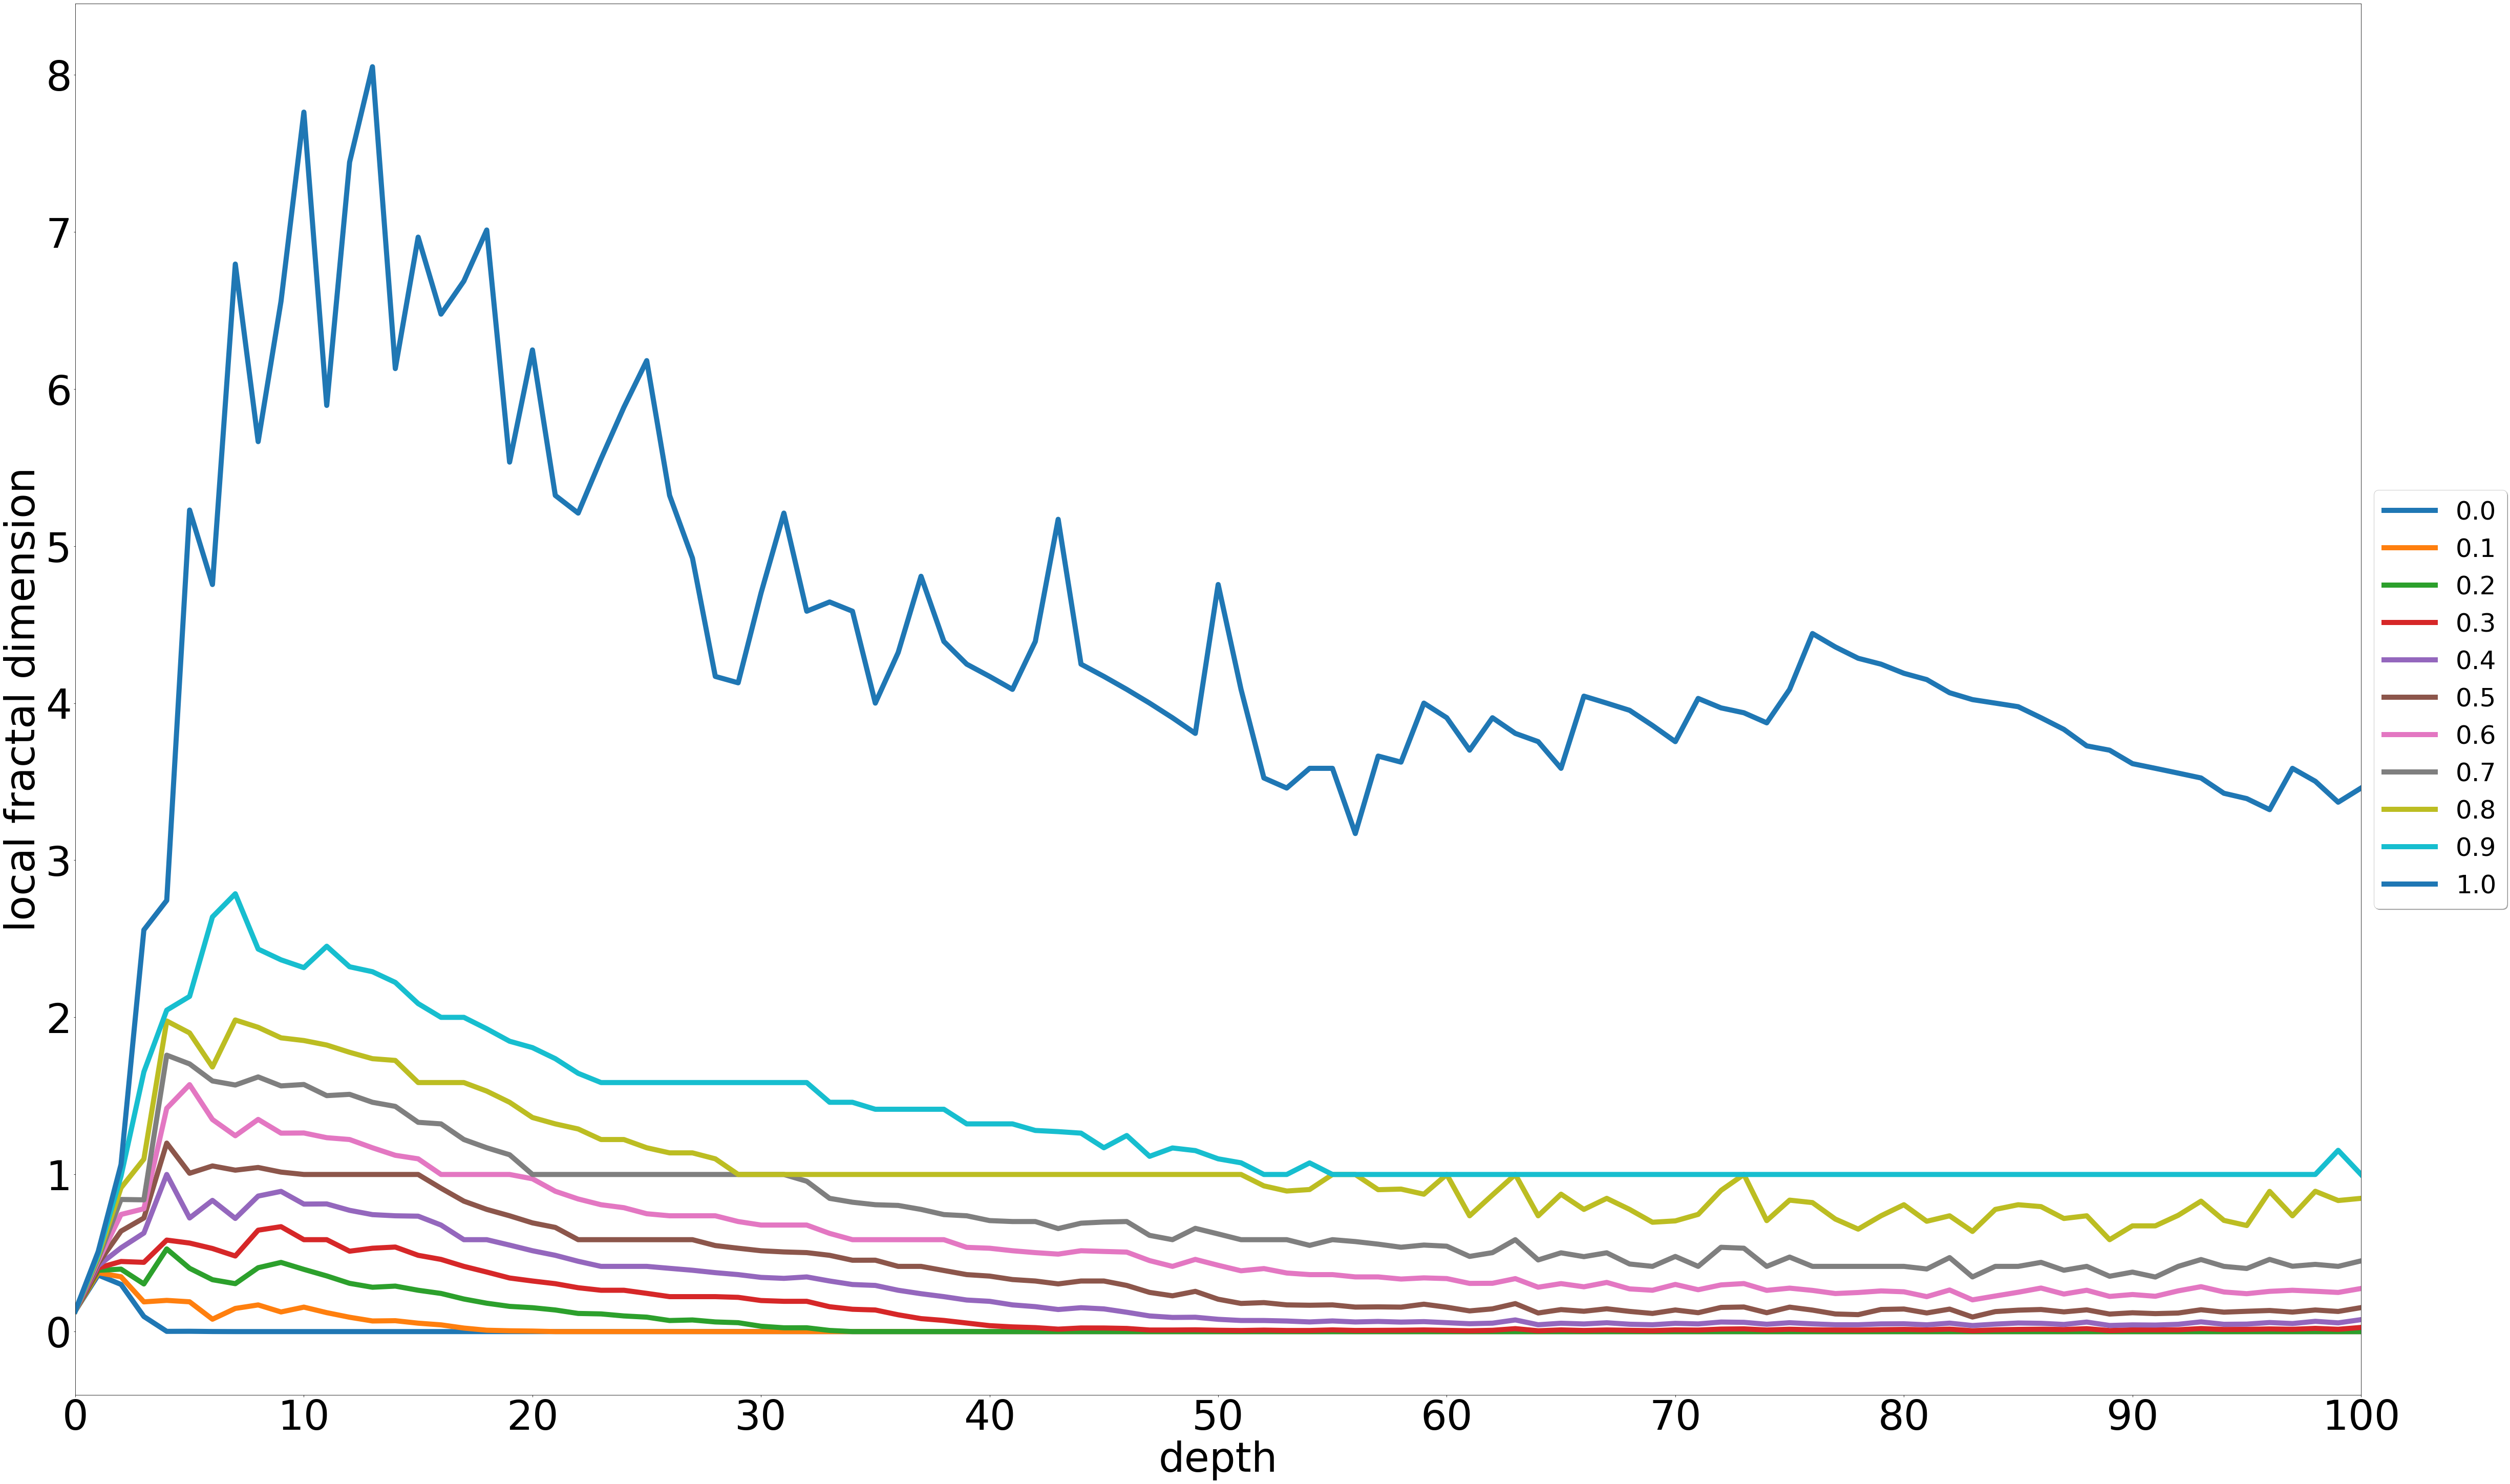

In [12]:
tags = list(map(str, labels))
quantiles_df = pd.DataFrame(quantiles)
quantiles_df['quantiles'] = labels
quantiles_df.set_index('quantiles', inplace=True)
quantiles_df_transpose = quantiles_df.T
fig, ax = plt.subplots()
my_plt = quantiles_df_transpose.plot(figsize=(100, 50), ax=ax, linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':50},
          fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
plt.xticks(list(range(0, tree_depth + 1, 10)))
# ax.set_ylim([-0.5, 10.5])
# plt.yticks([i for i in range(0, 11, 2)])
plt.xlabel('depth', fontsize=80)
plt.ylabel('local fractal dimension', fontsize=80)
plt.show()
my_plt.get_figure().savefig(f'plots/lfd_vs_depth_{dataset}_{metric}.png')

In [44]:
num_queries = 50

In [45]:
raw_data = pd.read_csv(
    f'logs/search_benchmarks_{dataset}_{metric}.csv',
    dtype={
        'depth': int,
        'radius': np.float64,
        'correctness': bool,
        'false_negative_rate': np.float64,
        'num_hits': int,
        'num_clusters_searched': int,
        'fraction_searched': np.float64,
        'df_calls_made': int,
        'linear_time': np.float64,
        'chess_time': np.float64,
        'speedup_factor': np.float64,
    }
)
# raw_data = raw_data[:140]
raw_data.head()

,depth,radius,correctness,false_negative_rate,num_hits,num_clusters_searched,fraction_searched,df_calls_made,linear_time,chess_time,speedup_factor
0,0,0.001,True,0.0,0,1,1.000000,1017383,58.483636,58.329834,1.003
1,5,0.001,True,0.0,0,16,0.985951,1003090,58.483636,57.694668,1.014
2,10,0.001,True,0.0,0,195,0.627036,637936,58.483636,37.553085,1.557
3,15,0.001,True,0.0,0,552,0.350856,356955,58.483636,21.698547,2.695
4,20,0.001,True,0.0,0,914,0.045050,45833,58.483636,4.551773,12.849


In [93]:
depths = list(range(0, 50 + 1, 5))
# depths

In [102]:
speedup_raw = raw_data[raw_data.radius == 0.001]
speedup_raw = speedup_raw[speedup_raw.depth >= 50]
speedup_raw.fraction_searched.describe()

count    550.000000
mean       0.002307
std        0.001959
min        0.000013
25%        0.000644
50%        0.001823
75%        0.003468
max        0.007846
Name: fraction_searched, dtype: float64

In [47]:
total_linear_time = raw_data.linear_time.sum() / (raw_data.shape[0] / num_queries)
total_chess_time = raw_data.chess_time.sum()
total_time = total_chess_time + total_linear_time
print(f'total time: {total_time:.4f}')

total time: 27213.6644


In [48]:
radii_dict = {
    'euclidean': [2000.0, 4000.0],
    'cosine': [0.0005, 0.001],
    'hamming': [0.001, 0.01],
}
radii = radii_dict[metric]

In [49]:
data_by_search_radius = {}
for r in radii:
    temp_df = raw_data[raw_data.radius == r]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_radius[r] = temp_df
data_by_search_radius.keys()

dict_keys([0.001, 0.01])

In [52]:
data_by_search_depth = {}
for d in depths:
    temp_df = raw_data[raw_data.depth == d]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_depth[d] = temp_df
data_by_search_depth.keys()

dict_keys([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [60]:
x = depths
y1 = []  # comparisons
y2 = []  # speedup
y3 = []  # time
y4 = []  # fraction
ys = []

In [61]:
print(f'depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, speedup_mu')
for r in radii:
    mos = data_by_search_radius[r].num_hits.mean()
    sos = data_by_search_radius[r].num_hits.std()
    print(f'\nradius: {r}, mean_output_size: {mos:.0f}, std_output_size: {sos:.0f}')
    for depth, df_by_depth in data_by_search_depth.items():
        if (not depth in depths) or (depth % 5 != 0) or (depth > 50):
            continue
            
        data_df = df_by_depth[df_by_depth.radius == r]
        
        mean_df_calls = data_df.df_calls_made.mean() / 10_000
        stddev_df_calls = data_df.df_calls_made.std() / 10_000
        y1.append(mean_df_calls)
        
        mean_speedup = data_df.speedup_factor.mean()
        y2.append(mean_speedup)
        
        mean_time = data_df.chess_time.mean()
        stddev_time = data_df.chess_time.std()
        y3.append(mean_time)
        
        mean_fraction = data_df.fraction_searched.mean()
        stddev_fraction = data_df.fraction_searched.std()
        y4.append(mean_fraction)
        
        
        print(f'{depth} & {mean_df_calls:.2f} & {stddev_df_calls:.2f} & {mean_time:.2f} & '
              f'{stddev_time:.2f} & {mean_fraction:.3f} & '
              f'{mean_speedup:.2f}\\\\')
    ys.append((y1.copy(), y2.copy(), y3.copy(), y4.copy()))
    y1, y2, y3, y4 = [], [], [], []

depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, speedup_mu

radius: 0.001, mean_output_size: 19, std_output_size: 53
0 & 101.74 & 0.00 & 58.33 & 0.23 & 1.000 & 1.00\\
5 & 96.40 & 15.00 & 55.43 & 8.55 & 0.948 & 1.14\\
10 & 58.27 & 16.43 & 33.62 & 9.45 & 0.573 & 18.46\\
15 & 20.39 & 13.51 & 12.31 & 7.99 & 0.200 & 52.30\\
20 & 5.58 & 6.14 & 4.40 & 3.98 & 0.055 & 82.45\\
25 & 1.50 & 1.99 & 2.27 & 1.79 & 0.015 & 94.99\\
30 & 0.32 & 0.37 & 1.66 & 1.07 & 0.003 & 99.89\\
35 & 0.25 & 0.24 & 1.64 & 1.05 & 0.002 & 100.28\\
40 & 0.24 & 0.21 & 1.65 & 1.08 & 0.002 & 100.30\\
45 & 0.24 & 0.20 & 1.64 & 1.04 & 0.002 & 100.32\\
50 & 0.23 & 0.20 & 1.63 & 1.04 & 0.002 & 100.43\\

radius: 0.01, mean_output_size: 2532, std_output_size: 8031
0 & 101.74 & 0.00 & 58.36 & 0.19 & 1.000 & 1.00\\
5 & 97.86 & 12.12 & 56.24 & 6.93 & 0.962 & 1.08\\
10 & 73.72 & 18.26 & 42.61 & 10.57 & 0.725 & 9.37\\
15 & 43.20 & 15.52 & 26.19 & 9.21 & 0.425 & 20.49\\
20 & 18.31 & 10.29 & 13.58 & 6.98 & 0.180 & 24.74

In [62]:
np.shape(ys[0][0])

(11,)

<Figure size 432x288 with 0 Axes>

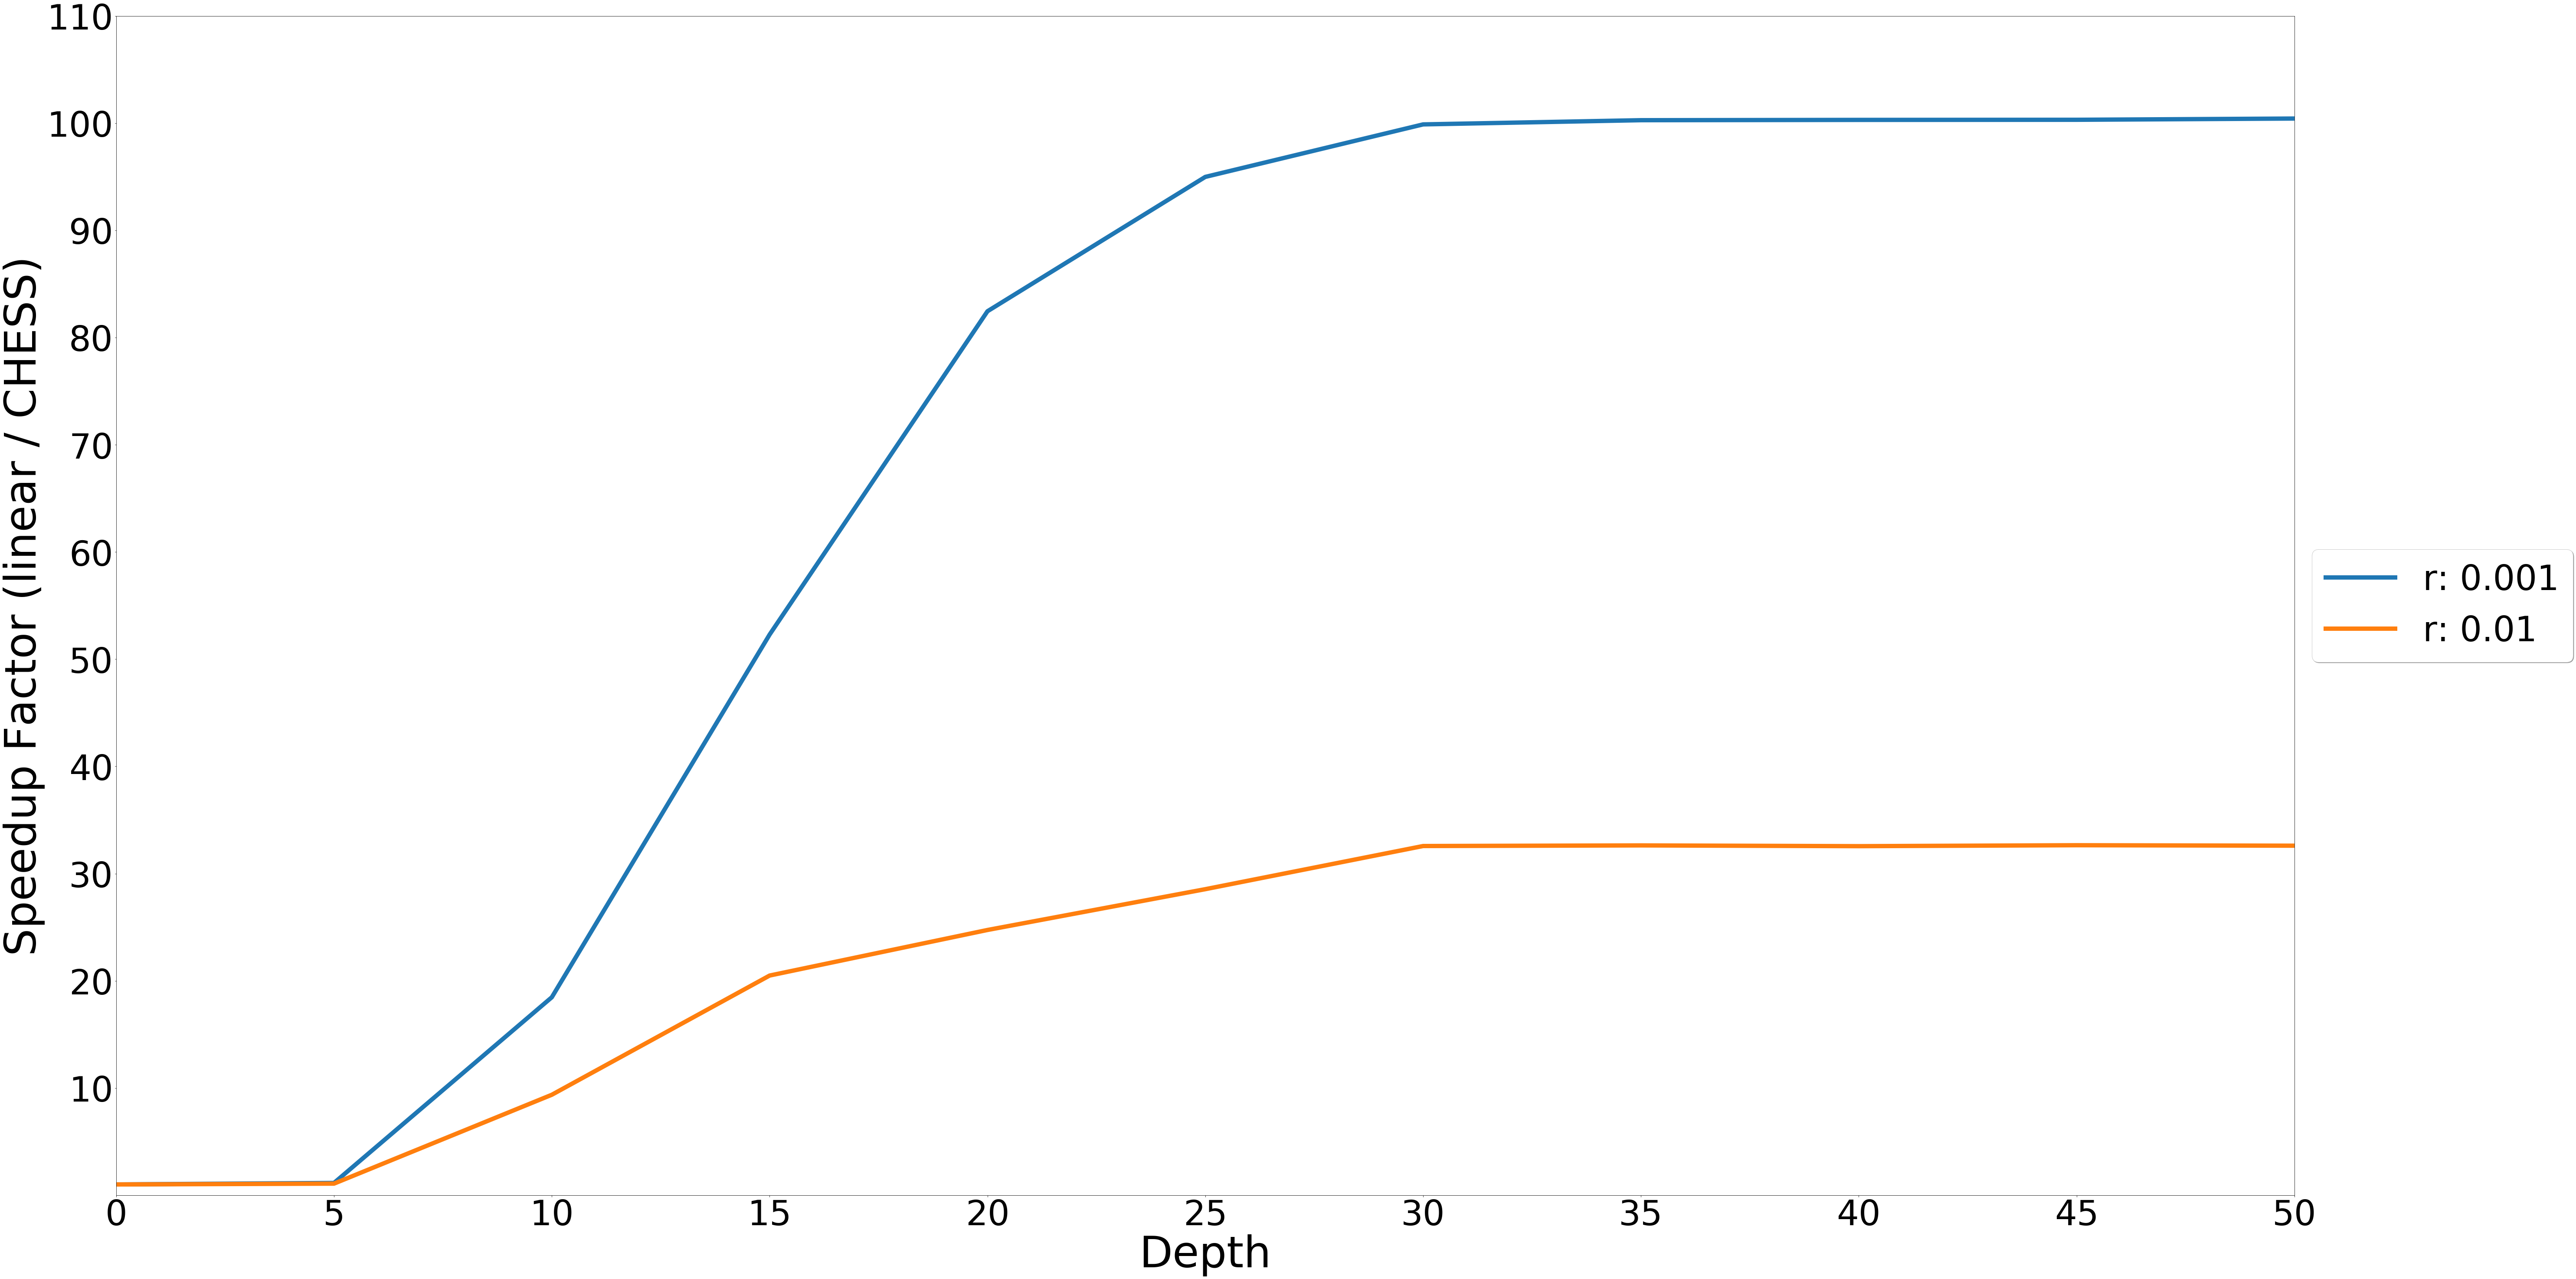

In [64]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][1], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, 50])
plt.xticks([i for i in range(0, 50 + 1, 5)])
ax.set_ylim([0, 110])
plt.yticks([i for i in range(10, 111, 10)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Speedup Factor (linear / CHESS)', fontsize=100)
plt.show()
fig.savefig(f'plots/speedup_factor_{dataset}_{metric}.png')

<Figure size 432x288 with 0 Axes>

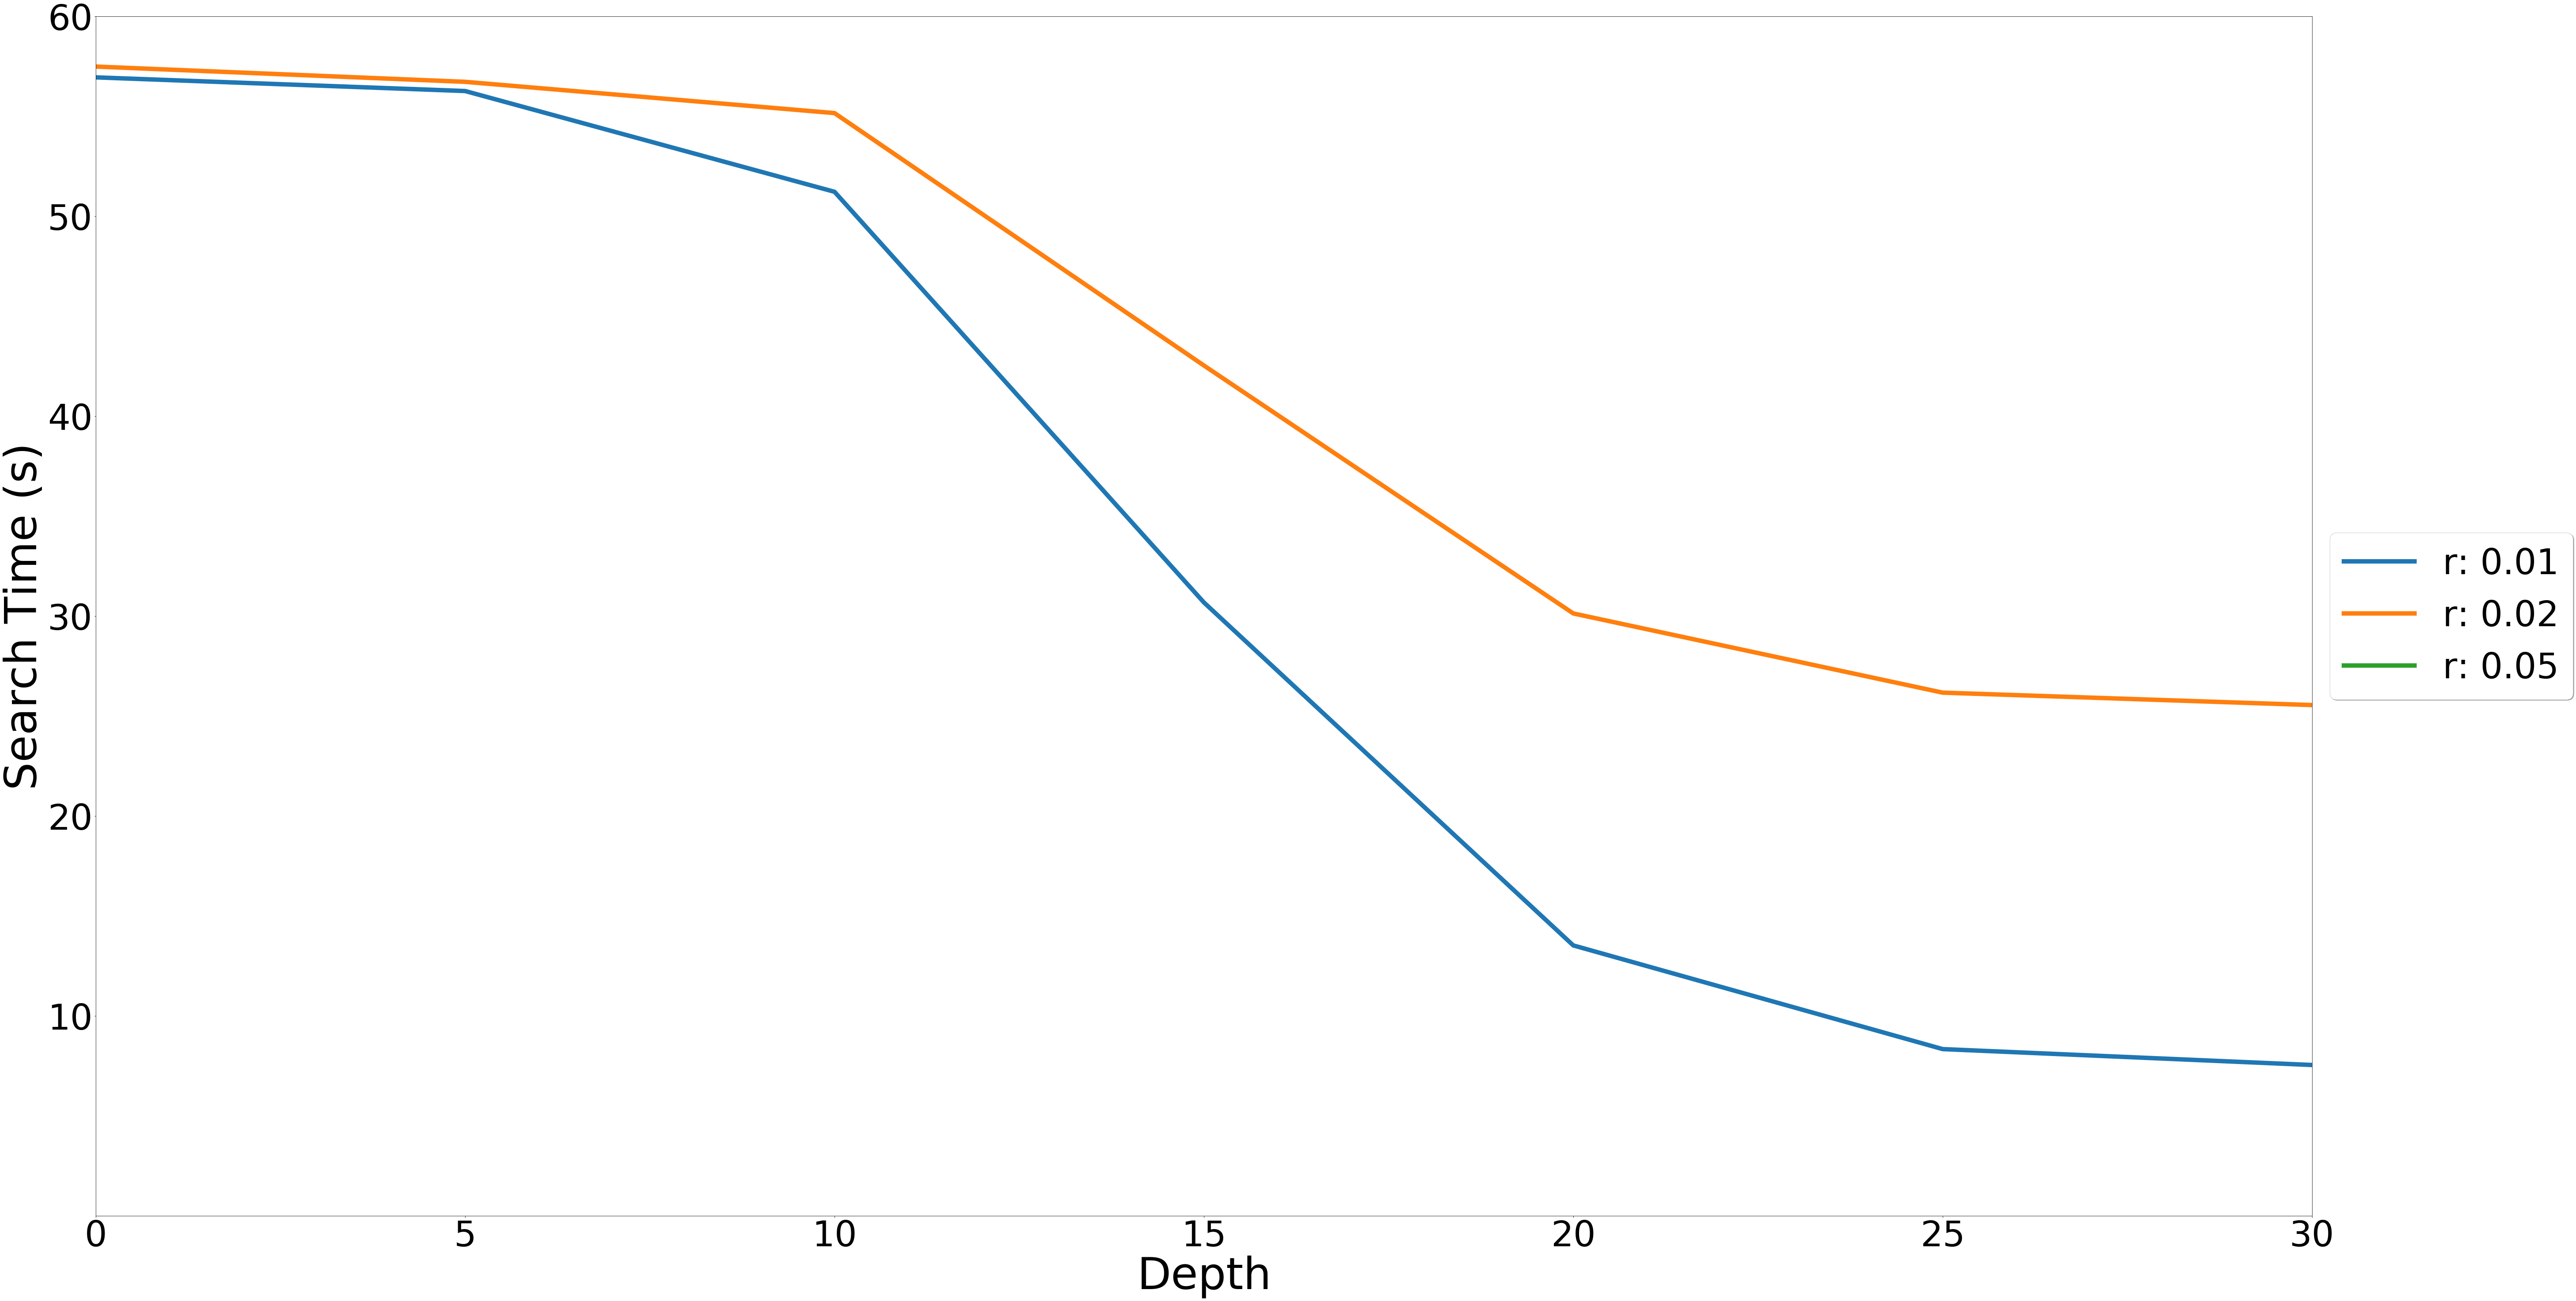

In [80]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][2], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
ax.set_ylim([0, 60])
plt.yticks([i for i in range(10, 61, 10)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Search Time (s)', fontsize=100)
plt.show()
fig.savefig(f'plots/search_time_{dataset}_{metric}.png')